In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
data = (r"C:\Users\suyas\OneDrive\Documents\Desktop\task 2\train.csv")
titanic = pd.read_csv(data)

In [4]:
# Display basic information about the dataset
print("Dataset Preview:")
print(titanic.head())
print("\nDataset Information:")
print(titanic.info())
print("\nMissing Values:")
print(titanic.isnull().sum())

Dataset Preview:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   

In [5]:
# Fill missing values
# Age: Fill missing values with the median
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

# Embarked: Fill missing values with the mode
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

# Cabin: Drop the Cabin column as it has too many missing values
titanic.drop(columns=['Cabin'], inplace=True)

# Check for duplicates and remove them
titanic.drop_duplicates(inplace=True)

# Ensure data types are correct
print("\nUpdated Dataset Information:")
print(titanic.info())


Updated Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
None


C:\Users\suyas\AppData\Local\Temp/ipykernel_9292/583473157.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
C:\Users\suyas\AppData\Local\Temp/ipykernel_9292/583473157.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


C:\Users\suyas\AppData\Local\Temp/ipykernel_9292/3555210726.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=titanic, palette='viridis')


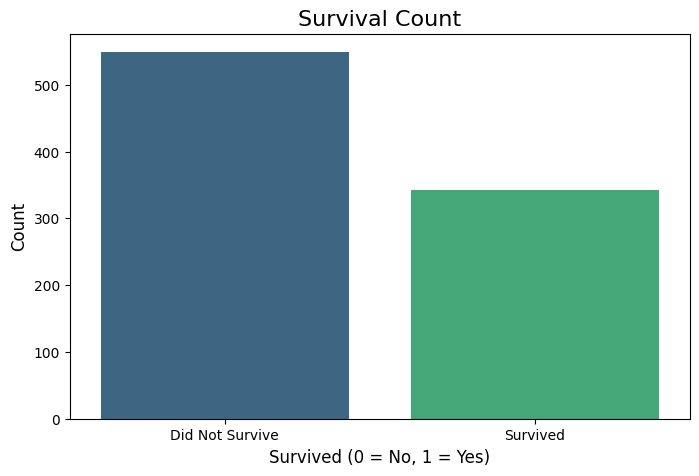

In [6]:
# 1. Univariate Analysis: Survival Count
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', data=titanic, palette='viridis')
plt.title('Survival Count', fontsize=16)
plt.xlabel('Survived (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], labels=['Did Not Survive', 'Survived'], fontsize=10)
plt.yticks(fontsize=10)
plt.show()

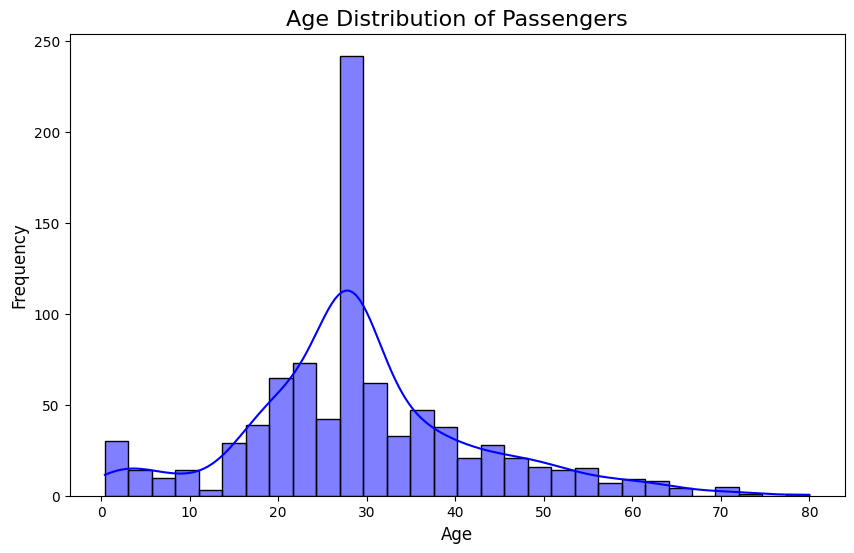

In [7]:
# 2. Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(titanic['Age'], bins=30, kde=True, color='blue', edgecolor='black')
plt.title('Age Distribution of Passengers', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

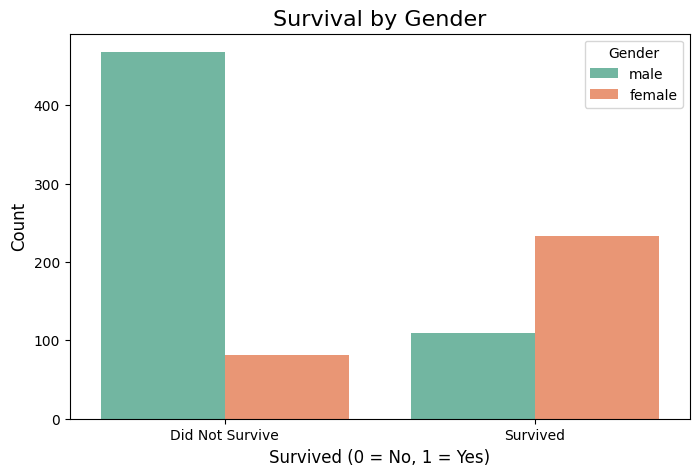

In [8]:
# 3. Survival by Gender
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', hue='Sex', data=titanic, palette='Set2')
plt.title('Survival by Gender', fontsize=16)
plt.xlabel('Survived (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Gender', loc='upper right')
plt.xticks([0, 1], labels=['Did Not Survive', 'Survived'], fontsize=10)
plt.yticks(fontsize=10)
plt.show()

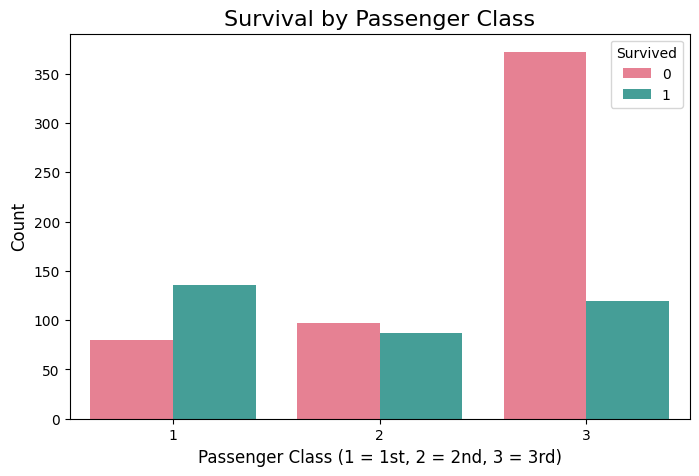

In [9]:
# 4. Survival by Class
plt.figure(figsize=(8, 5))
sns.countplot(x='Pclass', hue='Survived', data=titanic, palette='husl')
plt.title('Survival by Passenger Class', fontsize=16)
plt.xlabel('Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Survived', loc='upper right')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

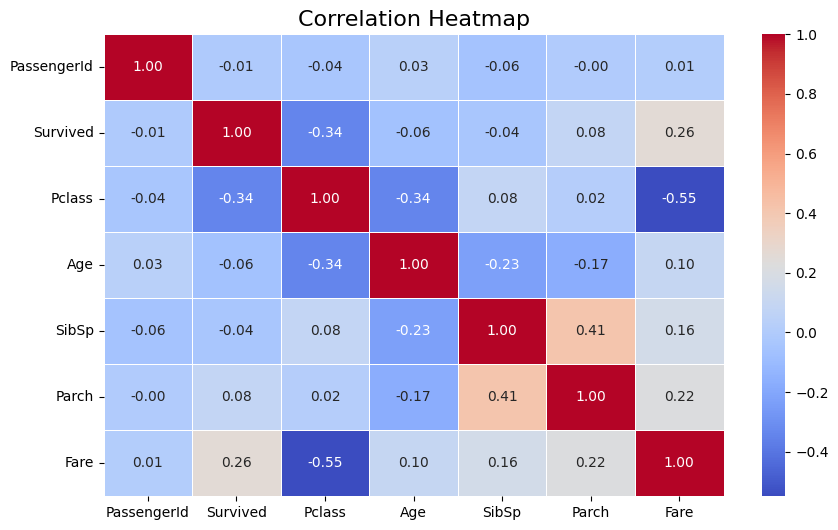

In [12]:
# Select only numeric columns for correlation
numeric_data = titanic.select_dtypes(include=['number'])

# Generate the correlation matrix and heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


In [11]:
# Summary Insights
# ----------------------------
print("\nKey Insights:")
print("1. Women had a significantly higher survival rate compared to men.")
print("2. Younger passengers (children) had better survival chances.")
print("3. Passengers in 1st class were more likely to survive compared to those in 2nd and 3rd class.")
print("4. There is a slight positive correlation between Fare and Survival.")


Key Insights:
1. Women had a significantly higher survival rate compared to men.
2. Younger passengers (children) had better survival chances.
3. Passengers in 1st class were more likely to survive compared to those in 2nd and 3rd class.
4. There is a slight positive correlation between Fare and Survival.
